In [1]:
# slightly process metal output to draw manhattan plot
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
from scipy.stats import norm

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# summary_origin = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/METALresult_A1corr_noMAFfilter_Allcohorts_withPC1.TBL",sep='\t')
# plink_meta_10cohort = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_10cohorts_withPC.meta",sep='\s+')
# plink_meta = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC.meta",sep='\s+')
# gwas_samantha = pd.read_csv("/exports/reum/CKe/generic-metal/RunMeta/gwas_version8_merged.assoc.logistic",sep='\s+')
plink_MTX = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/MTXsubset/RunMeta/PlinkMeta_A1corr_noMAFfilter_MTX.meta",sep='\s+')

In [4]:
plink_meta_8cohorts = pd.read_csv("/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/PlinkMeta_A1corr_noMAFfilter_MTX8cohorts_allsamples.meta",sep='\s+')

In [5]:
suggestiveHits_plink = plink_MTX[plink_MTX['P']<=1E-5].sort_values("P")
len(suggestiveHits_plink) 

0

In [6]:
significant_plink = plink_MTX[plink_MTX['P']<=5E-8].sort_values("P")
len(significant_plink) 

0

In [6]:
OR = np.exp(summary_origin['Effect'])
summary_origin.insert(6,'OR',OR)

In [7]:
SNP = gwas_samantha['SNP'].str.split(':',expand=True)[0]+":"+gwas_samantha['SNP'].str.split(':',expand=True)[1]+":"+gwas_samantha['A1']
gwas_samantha['SNP'] = SNP

In [7]:
#check carefully how it's generated before using Merged variable
Merged = pd.merge(plink_MTX,plink_meta_8cohorts,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_MTXsubgroup","_latest_meta"))
Merged

,CHR_MTXsubgroup,BP_MTXsubgroup,SNP,A1_MTXsubgroup,A2_MTXsubgroup,N_MTXsubgroup,P_MTXsubgroup,P(R)_MTXsubgroup,OR_MTXsubgroup,OR(R)_MTXsubgroup,Q_MTXsubgroup,I_MTXsubgroup,CHR_latest_meta,BP_latest_meta,A1_latest_meta,A2_latest_meta,N_latest_meta,P_latest_meta,P(R)_latest_meta,OR_latest_meta,OR(R)_latest_meta,Q_latest_meta,I_latest_meta
0,1,24470644,1:24470644:A,A,?,7,0.16310,0.17530,1.3982,1.6448,0.0659,49.28,1,24470644,A,?,7,0.066170,0.084280,1.3809,1.3744,0.3832,5.79
1,1,157755145,1:157755145:T,T,?,6,0.13550,0.13550,1.9010,1.9010,0.9363,0.00,1,157755145,T,?,6,0.002665,0.002665,2.8447,2.8447,0.9438,0.00
2,2,4117199,2:4117199:G,G,?,7,0.28650,0.28650,1.1285,1.1285,0.9743,0.00,2,4117199,G,?,7,0.078580,0.078580,1.1563,1.1563,0.8967,0.00
3,2,4118282,2:4118282:G,G,?,7,0.31930,0.31930,1.1206,1.1206,0.9806,0.00,2,4118282,G,?,7,0.102100,0.102100,1.1451,1.1451,0.9016,0.00
4,2,4122930,2:4122930:T,T,?,7,0.35040,0.35040,1.1136,1.1136,0.9822,0.00,2,4122930,T,?,7,0.103500,0.103500,1.1452,1.1452,0.8829,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16,77702804,16:77702804:C,C,?,7,0.38150,0.29800,0.8679,0.7989,0.1828,32.13,16,77702804,C,?,7,0.030880,0.217800,0.7684,0.7529,0.0065,66.48
96,17,6233478,17:6233478:C,C,?,7,0.08430,0.16070,0.7787,0.7893,0.3020,16.76,17,6233478,C,?,7,0.001598,0.020290,0.7183,0.7359,0.2134,28.16
97,17,6236228,17:6236228:A,A,?,8,0.06115,0.08516,0.7837,0.7884,0.3757,7.06,17,6236228,A,?,8,0.001457,0.009293,0.7324,0.7433,0.2722,19.87
98,17,13305606,17:13305606:A,A,?,7,0.02297,0.05357,0.6365,0.6235,0.2695,20.97,17,13305606,A,?,7,0.005989,0.005989,0.6829,0.6829,0.4937,0.00


In [12]:
IndSigSNPs = pd.read_table("../IndSigSNPs.txt")
IndSigSNPs['CHRBP'] = IndSigSNPs['uniqID'].str.rsplit(":",n=2,expand=True)[0]
IndSigSNPs

FileNotFoundError: [Errno 2] No such file or directory: '../IndSigSNPs.txt'

In [9]:
Merged['CHRBP'] = Merged['SNP'].str.rsplit(":",n=1,expand=True)[0]
Merged

,CHR_MTXsubgroup,BP_MTXsubgroup,SNP,A1_MTXsubgroup,A2_MTXsubgroup,N_MTXsubgroup,P_MTXsubgroup,P(R)_MTXsubgroup,OR_MTXsubgroup,OR(R)_MTXsubgroup,Q_MTXsubgroup,I_MTXsubgroup,CHR_latest_meta,BP_latest_meta,A1_latest_meta,A2_latest_meta,N_latest_meta,P_latest_meta,P(R)_latest_meta,OR_latest_meta,OR(R)_latest_meta,Q_latest_meta,I_latest_meta,CHRBP
0,1,24470644,1:24470644:A,A,?,7,0.16310,0.17530,1.3982,1.6448,0.0659,49.28,1,24470644,A,?,7,0.066170,0.084280,1.3809,1.3744,0.3832,5.79,1:24470644
1,1,157755145,1:157755145:T,T,?,6,0.13550,0.13550,1.9010,1.9010,0.9363,0.00,1,157755145,T,?,6,0.002665,0.002665,2.8447,2.8447,0.9438,0.00,1:157755145
2,2,4117199,2:4117199:G,G,?,7,0.28650,0.28650,1.1285,1.1285,0.9743,0.00,2,4117199,G,?,7,0.078580,0.078580,1.1563,1.1563,0.8967,0.00,2:4117199
3,2,4118282,2:4118282:G,G,?,7,0.31930,0.31930,1.1206,1.1206,0.9806,0.00,2,4118282,G,?,7,0.102100,0.102100,1.1451,1.1451,0.9016,0.00,2:4118282
4,2,4122930,2:4122930:T,T,?,7,0.35040,0.35040,1.1136,1.1136,0.9822,0.00,2,4122930,T,?,7,0.103500,0.103500,1.1452,1.1452,0.8829,0.00,2:4122930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16,77702804,16:77702804:C,C,?,7,0.38150,0.29800,0.8679,0.7989,0.1828,32.13,16,77702804,C,?,7,0.030880,0.217800,0.7684,0.7529,0.0065,66.48,16:77702804
96,17,6233478,17:6233478:C,C,?,7,0.08430,0.16070,0.7787,0.7893,0.3020,16.76,17,6233478,C,?,7,0.001598,0.020290,0.7183,0.7359,0.2134,28.16,17:6233478
97,17,6236228,17:6236228:A,A,?,8,0.06115,0.08516,0.7837,0.7884,0.3757,7.06,17,6236228,A,?,8,0.001457,0.009293,0.7324,0.7433,0.2722,19.87,17:6236228
98,17,13305606,17:13305606:A,A,?,7,0.02297,0.05357,0.6365,0.6235,0.2695,20.97,17,13305606,A,?,7,0.005989,0.005989,0.6829,0.6829,0.4937,0.00,17:13305606


In [10]:
Merged_IndsigSNPs = pd.merge(Merged,IndSigSNPs,how='inner',left_on='CHRBP',right_on='CHRBP')
Merged_IndsigSNPs

,CHR_MTXsubgroup,BP_MTXsubgroup,SNP,A1_MTXsubgroup,A2_MTXsubgroup,N_MTXsubgroup,P_MTXsubgroup,P(R)_MTXsubgroup,OR_MTXsubgroup,OR(R)_MTXsubgroup,Q_MTXsubgroup,I_MTXsubgroup,CHR_latest_meta,BP_latest_meta,A1_latest_meta,A2_latest_meta,N_latest_meta,P_latest_meta,P(R)_latest_meta,OR_latest_meta,OR(R)_latest_meta,Q_latest_meta,I_latest_meta,CHRBP,No,GenomicLocus,uniqID,rsID,chr,pos,p,nSNPs,nGWASSNPs
0,2,4117199,2:4117199:G,G,?,7,0.286500,0.286500,1.1285,1.1285,0.9743,0.00,2,4117199,G,?,7,0.078580,0.078580,1.1563,1.1563,0.8967,0.00,2:4117199,1,1,2:4117199:C:G,rs4850040,2,4117199,8.871000e-06,58,21
1,2,179448911,2:179448911:A,A,?,8,0.009849,0.033900,1.3581,1.4171,0.1313,37.34,2,179448911,A,?,8,0.009184,0.026790,1.2587,1.2622,0.2495,22.60,2:179448911,2,2,2:179448911:A:G,rs16866400,2,179448911,1.625000e-08,49,25
2,2,179458591,2:179458591:T,T,?,8,0.194000,0.218800,1.1975,1.2040,0.3571,9.43,2,179458591,T,?,8,0.301200,0.313700,1.1120,1.1177,0.3535,9.89,2:179458591,3,2,2:179458591:C:T,rs2288569,2,179458591,1.028000e-06,41,19
3,5,119178721,5:119178721:A,A,?,7,0.211900,0.461900,0.7597,0.8127,0.2127,28.26,5,119178721,A,?,7,0.501600,0.475300,1.1055,1.1758,0.0917,44.93,5:119178721,4,3,5:119178721:A:T,rs7708816,5,119178721,2.479000e-06,5,3
4,6,69670142,6:69670142:C,C,?,7,0.017190,0.074540,1.3293,1.3272,0.1791,32.61,6,69670142,C,?,7,0.058010,0.146500,1.1770,1.1606,0.2606,22.12,6:69670142,5,4,6:69670142:C:G,rs3757043,6,69670142,6.792000e-06,5,3
5,6,156289111,6:156289111:A,A,?,7,0.385600,0.504500,0.9075,0.9203,0.3431,11.32,6,156289111,A,?,7,0.005193,0.005193,0.7973,0.7973,0.8693,0.00,6:156289111,6,5,6:156289111:A:C,rs6931683,6,156289111,2.697000e-06,57,25
6,6,166310711,6:166310711:A,A,?,8,0.087550,0.087550,0.8285,0.8285,0.9100,0.00,6,166310711,A,?,8,0.007480,0.007480,0.8033,0.8033,0.8496,0.00,6:166310711,7,6,6:166310711:A:G,rs2461720,6,166310711,3.160000e-06,47,24
7,7,140117809,7:140117809:C,C,?,7,0.024290,0.144300,1.3538,1.2890,0.2013,29.72,7,140117809,C,?,7,0.001105,0.001105,1.3572,1.3572,0.7491,0.00,7:140117809,8,7,7:140117809:C:T,rs12667917,7,140117809,7.380000e-06,16,3
8,8,74435989,8:74435989:C,C,?,7,0.002040,0.002040,1.8055,1.8055,0.5690,0.00,8,74435989,C,?,7,0.027910,0.027910,1.3500,1.3500,0.4366,0.00,8:74435989,9,8,8:74435989:C:T,rs7846061,8,74435989,1.454000e-06,15,8
9,9,103934889,9:103934889:T,T,?,8,0.018600,0.060500,1.3732,1.3797,0.2002,28.57,9,103934889,T,?,8,0.012750,0.012750,1.2804,1.2804,0.4509,0.00,9:103934889,10,9,9:103934889:C:T,rs61489062,9,103934889,6.966000e-06,61,20


In [11]:
Merged_IndsigSNPs.loc[:,['SNP','OR_MTXsubgroup','OR_latest_meta']]

,SNP,OR_MTXsubgroup,OR_latest_meta
0,2:4117199:G,1.1285,1.1563
1,2:179448911:A,1.3581,1.2587
2,2:179458591:T,1.1975,1.1120
3,5:119178721:A,0.7597,1.1055
4,6:69670142:C,1.3293,1.1770
5,6:156289111:A,0.9075,0.7973
6,6:166310711:A,0.8285,0.8033
7,7:140117809:C,1.3538,1.3572
8,8:74435989:C,1.8055,1.3500
9,9:103934889:T,1.3732,1.2804


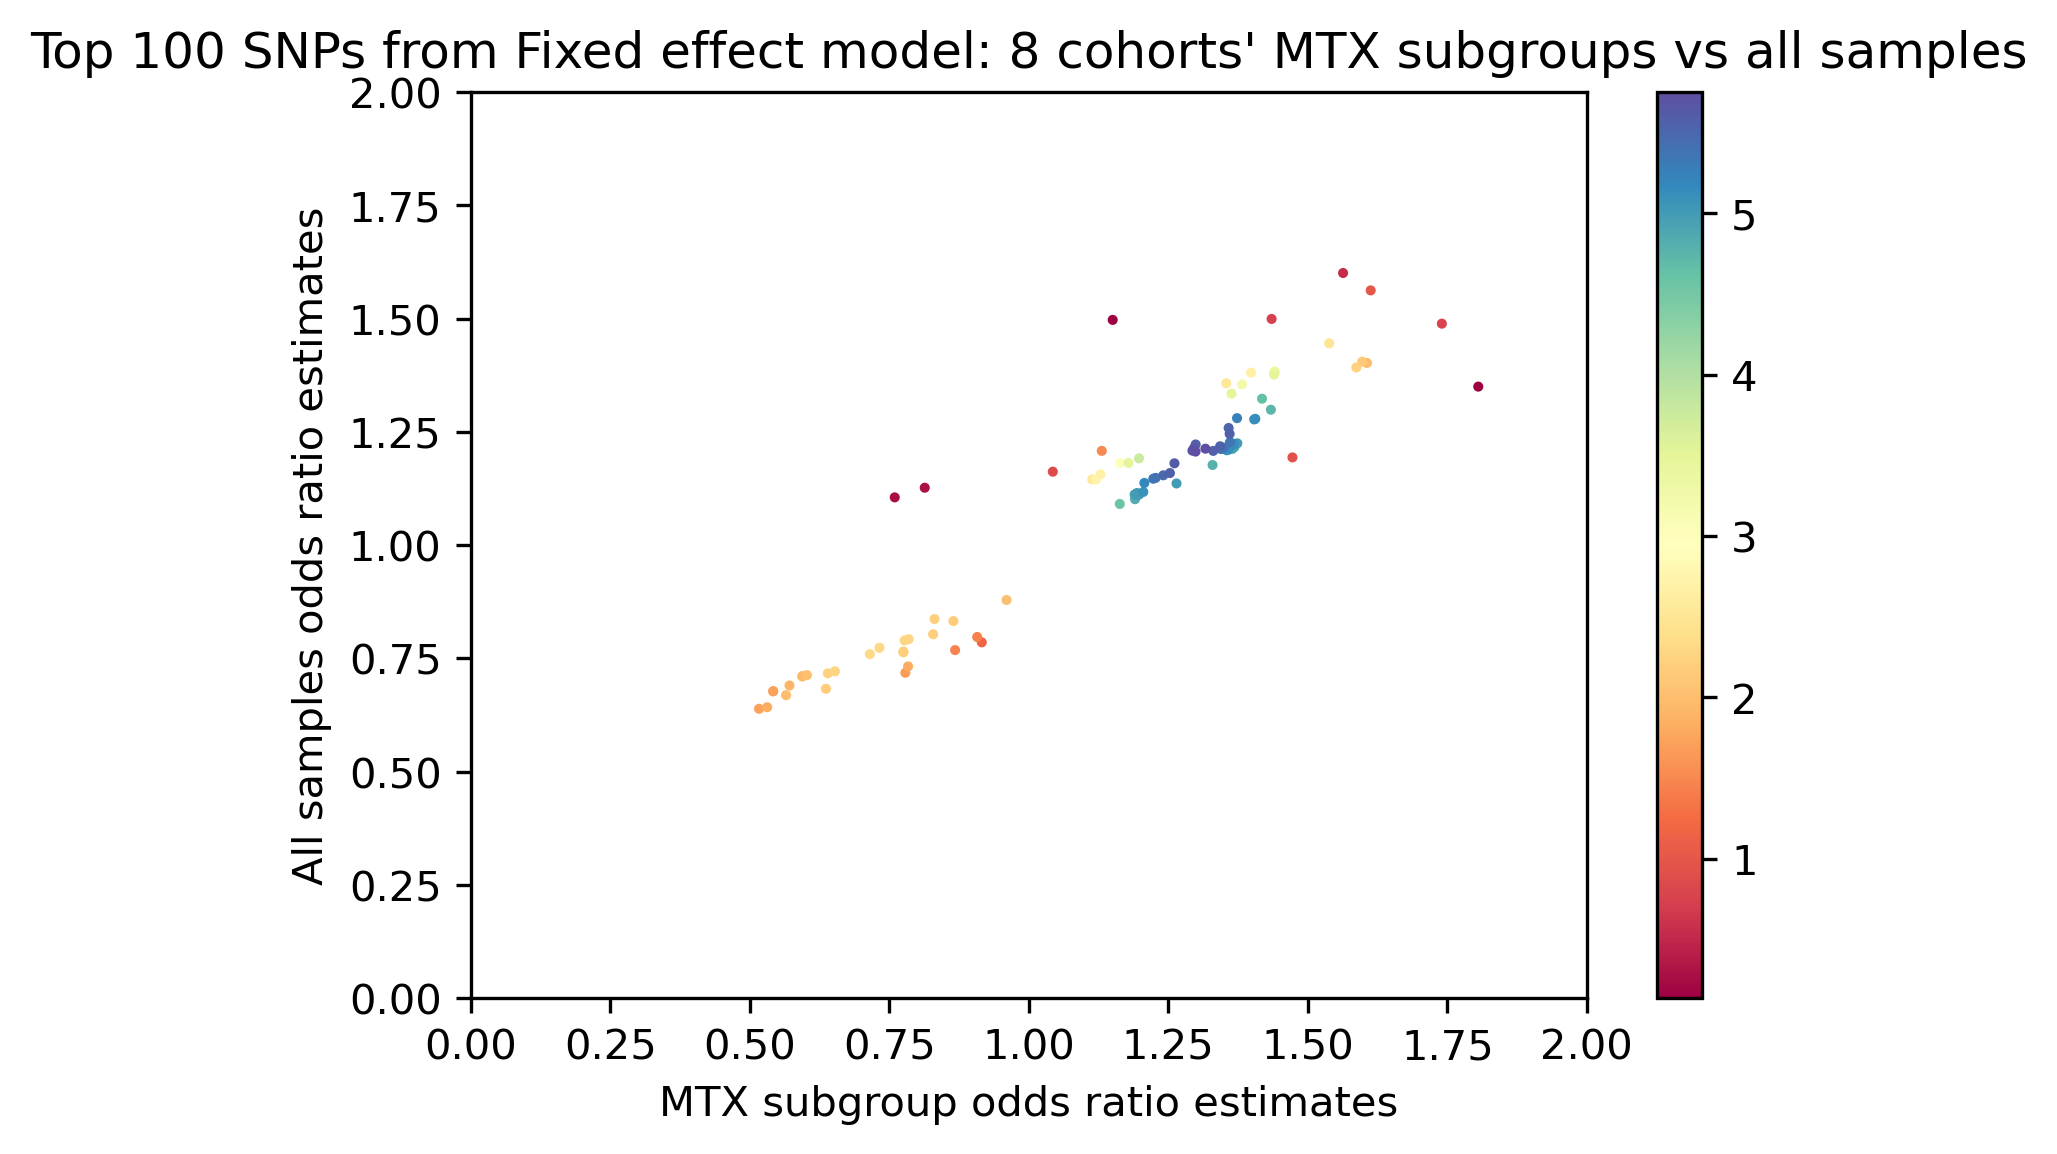

In [26]:
# Calculate the point density for effect sizes
# Compare overall OR of fixed vs random effect models for all snps
# fig, ax = plt.subplots()
plt.figure(dpi=300)
plt.title('Top 100 SNPs from Fixed effect model: 8 cohorts\' MTX subgroups vs all samples',fontsize=12)

plt.xlabel('MTX subgroup odds ratio estimates')
plt.ylabel('All samples odds ratio estimates')

x = Merged['OR_MTXsubgroup']
y = Merged['OR_latest_meta']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


plt.xlim([0,2])
plt.ylim([0,2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

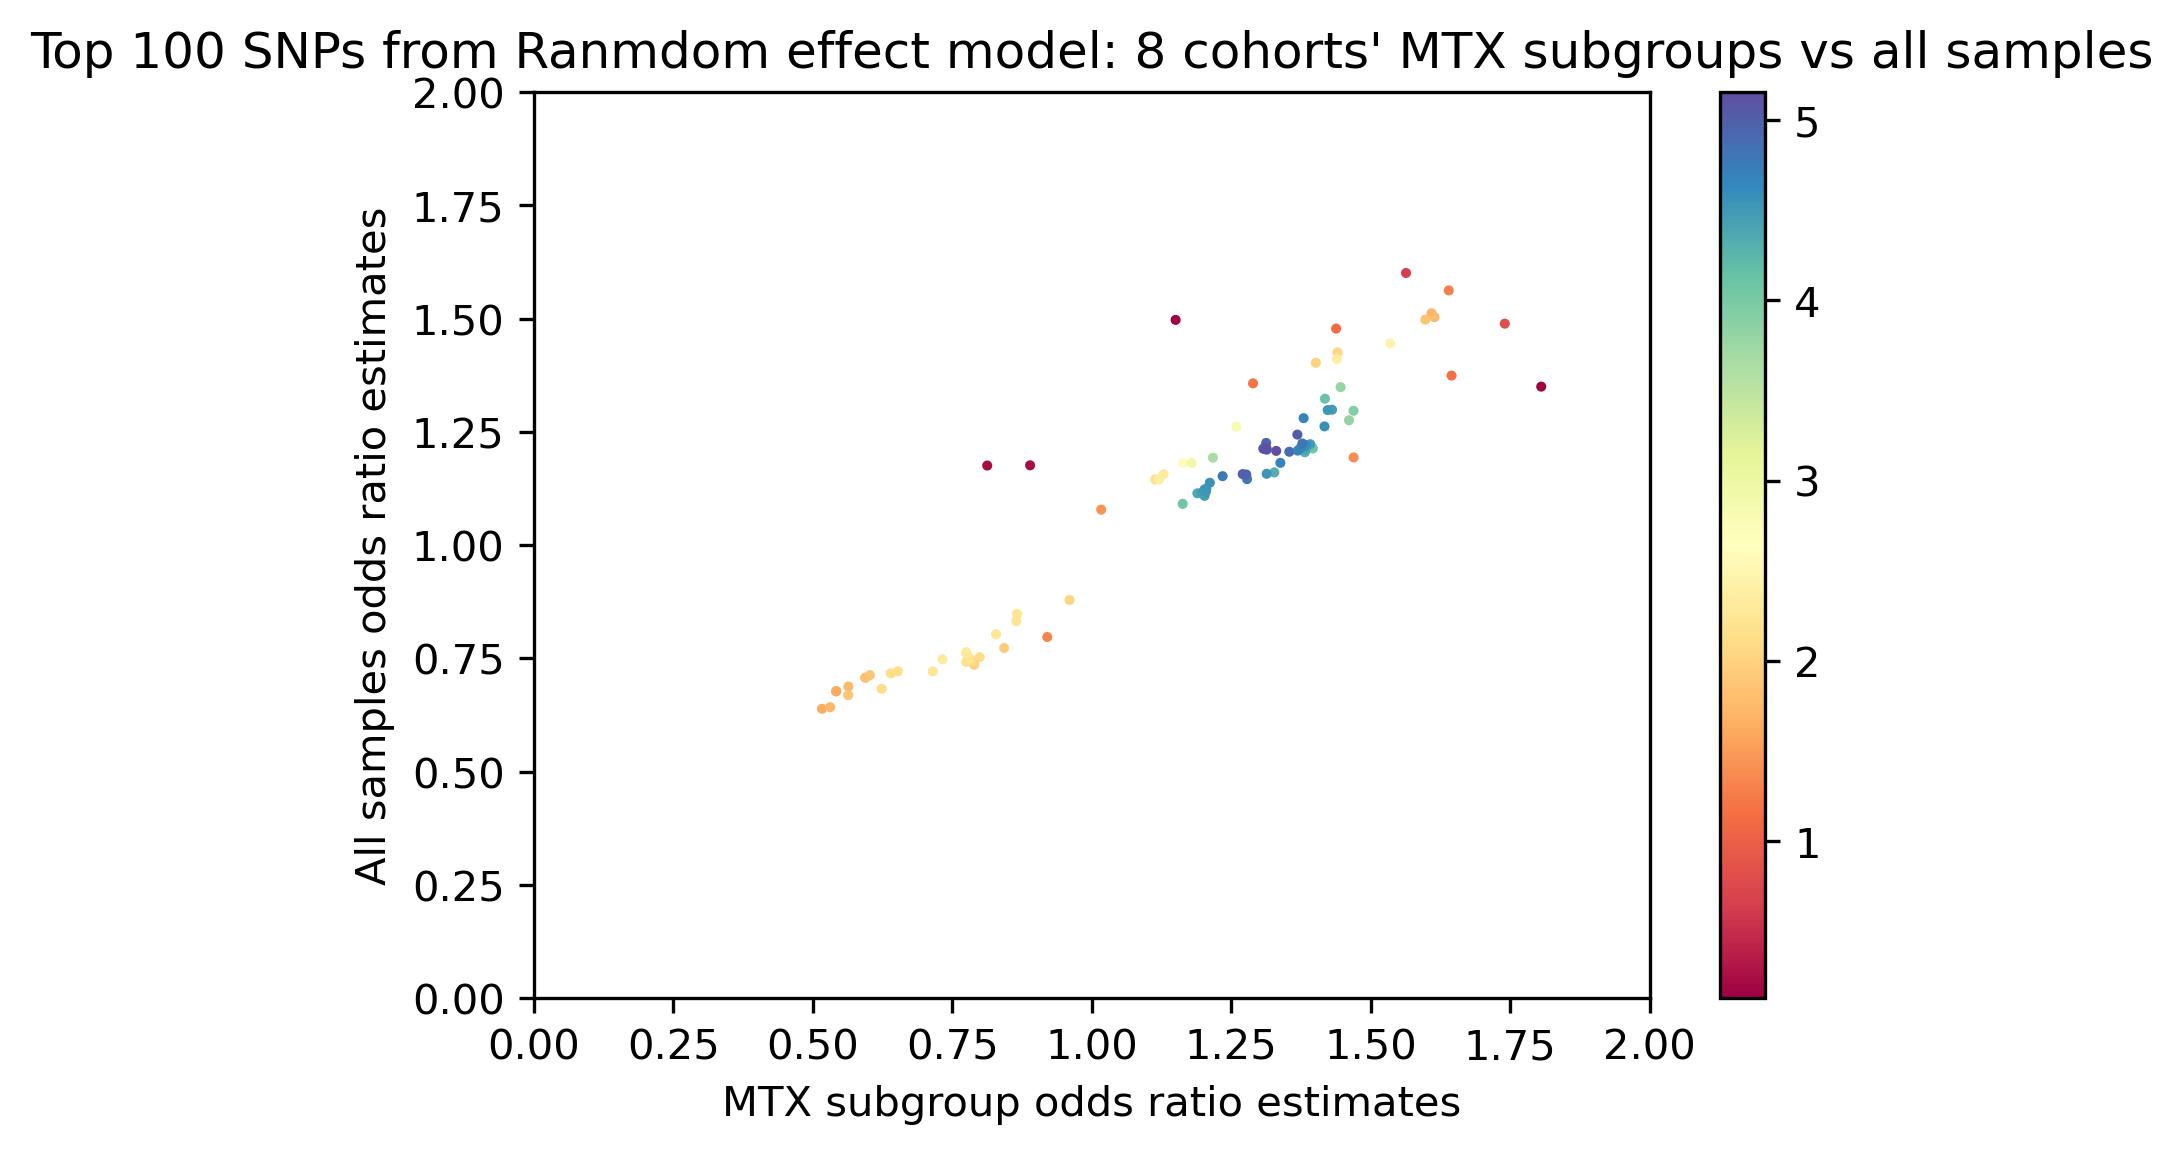

In [27]:
# Calculate the point density for effect sizes
# Compare overall OR of fixed vs random effect models for all snps
# fig, ax = plt.subplots()
plt.figure(dpi=300)
plt.title('Top 100 SNPs from Ranmdom effect model: 8 cohorts\' MTX subgroups vs all samples',fontsize=12)

plt.xlabel('MTX subgroup odds ratio estimates')
plt.ylabel('All samples odds ratio estimates')

x = Merged['OR(R)_MTXsubgroup']
y = Merged['OR(R)_latest_meta']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.xlim([0,2])
plt.ylim([0,2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

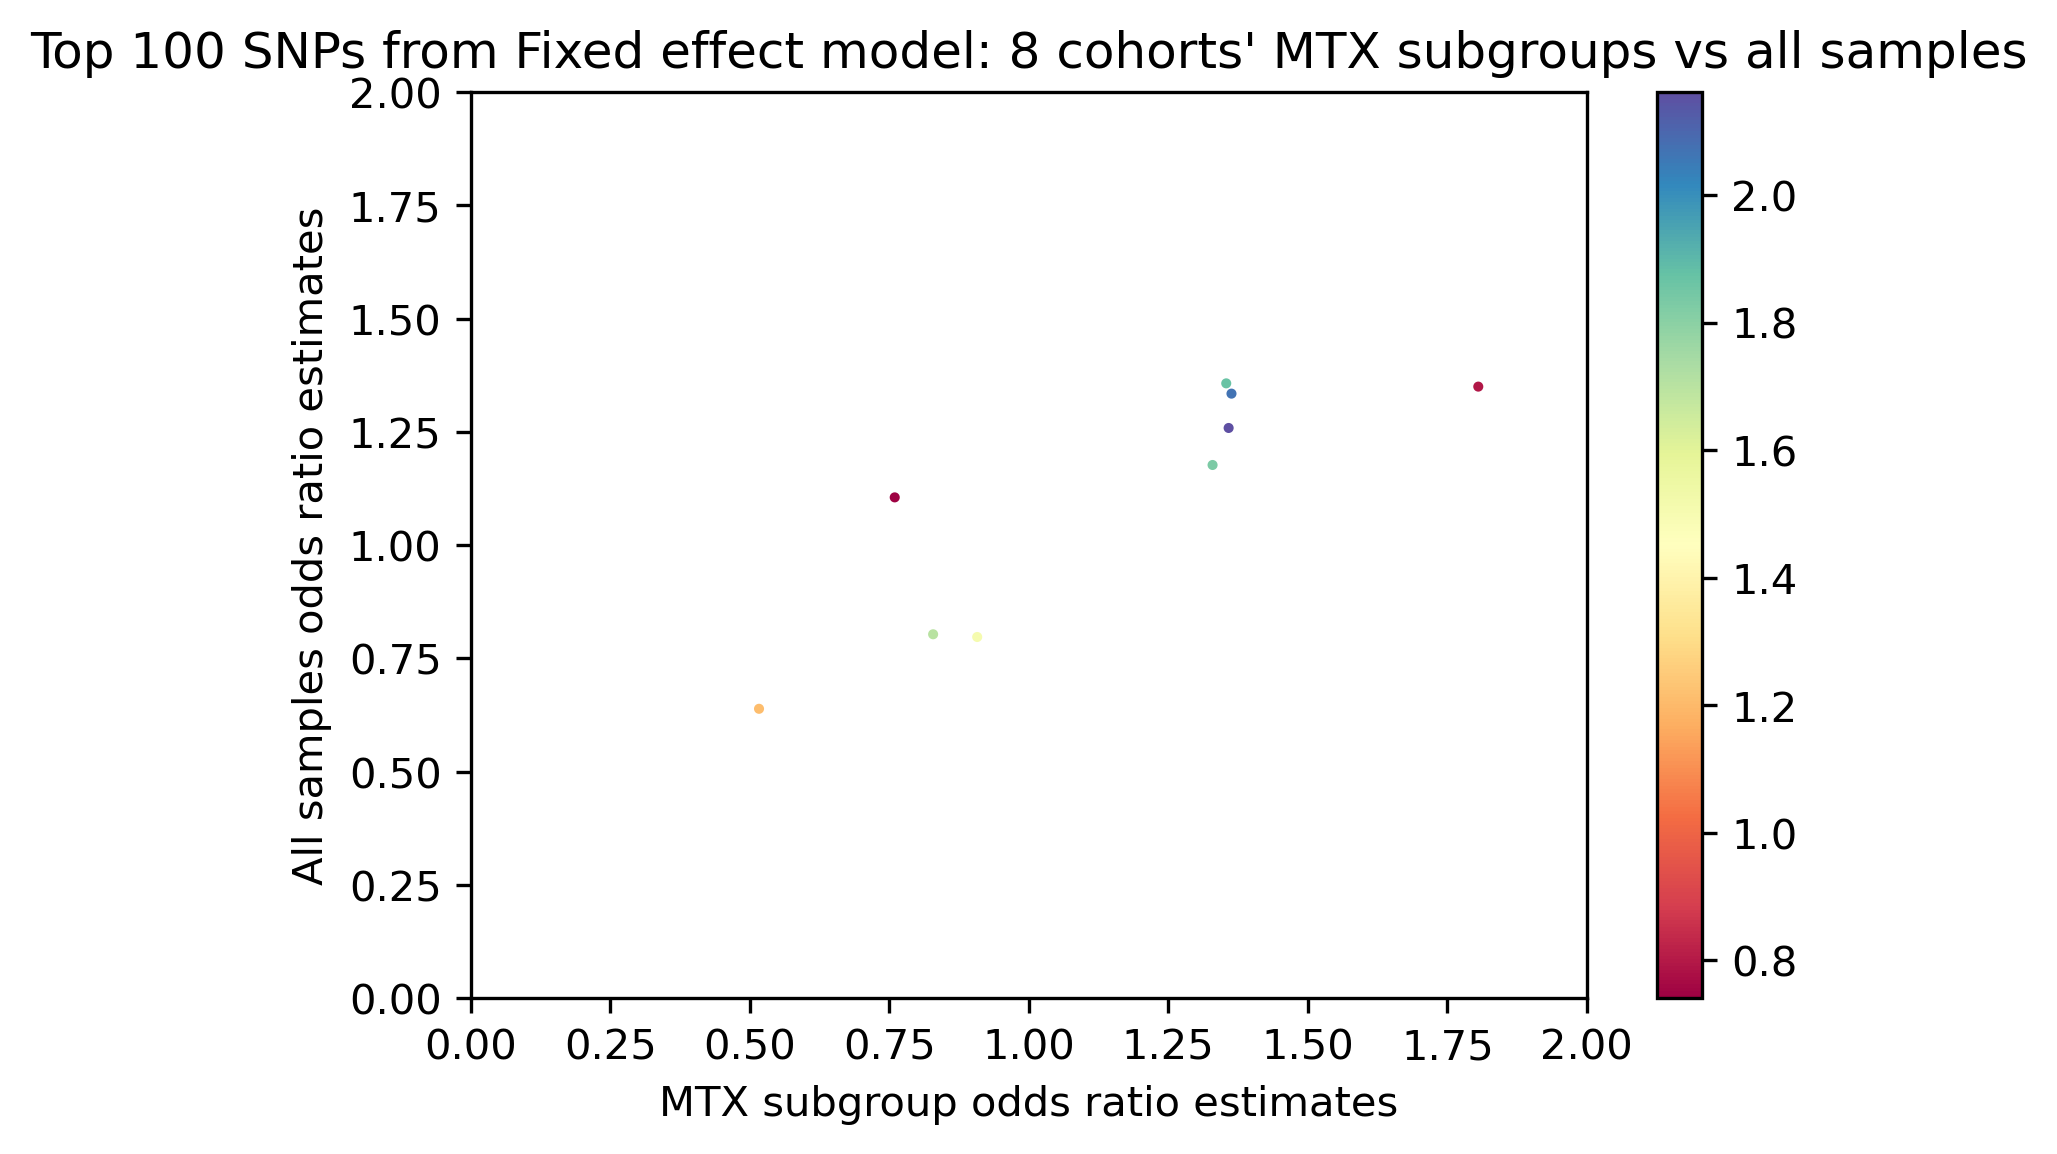

In [17]:
# Calculate the point density for effect sizes
# Compare overall OR of fixed vs random effect models for all snps
# fig, ax = plt.subplots()
plt.figure(dpi=300)
plt.title('Top 100 SNPs from Fixed effect model: 8 cohorts\' MTX subgroups vs all samples',fontsize=12)

plt.xlabel('MTX subgroup odds ratio estimates')
plt.ylabel('All samples odds ratio estimates')

x = Merged_IndsigSNPs['OR_MTXsubgroup']
y = Merged_IndsigSNPs['OR_latest_meta']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


plt.xlim([0,2])
plt.ylim([0,2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')

plt.colorbar()
plt.show()

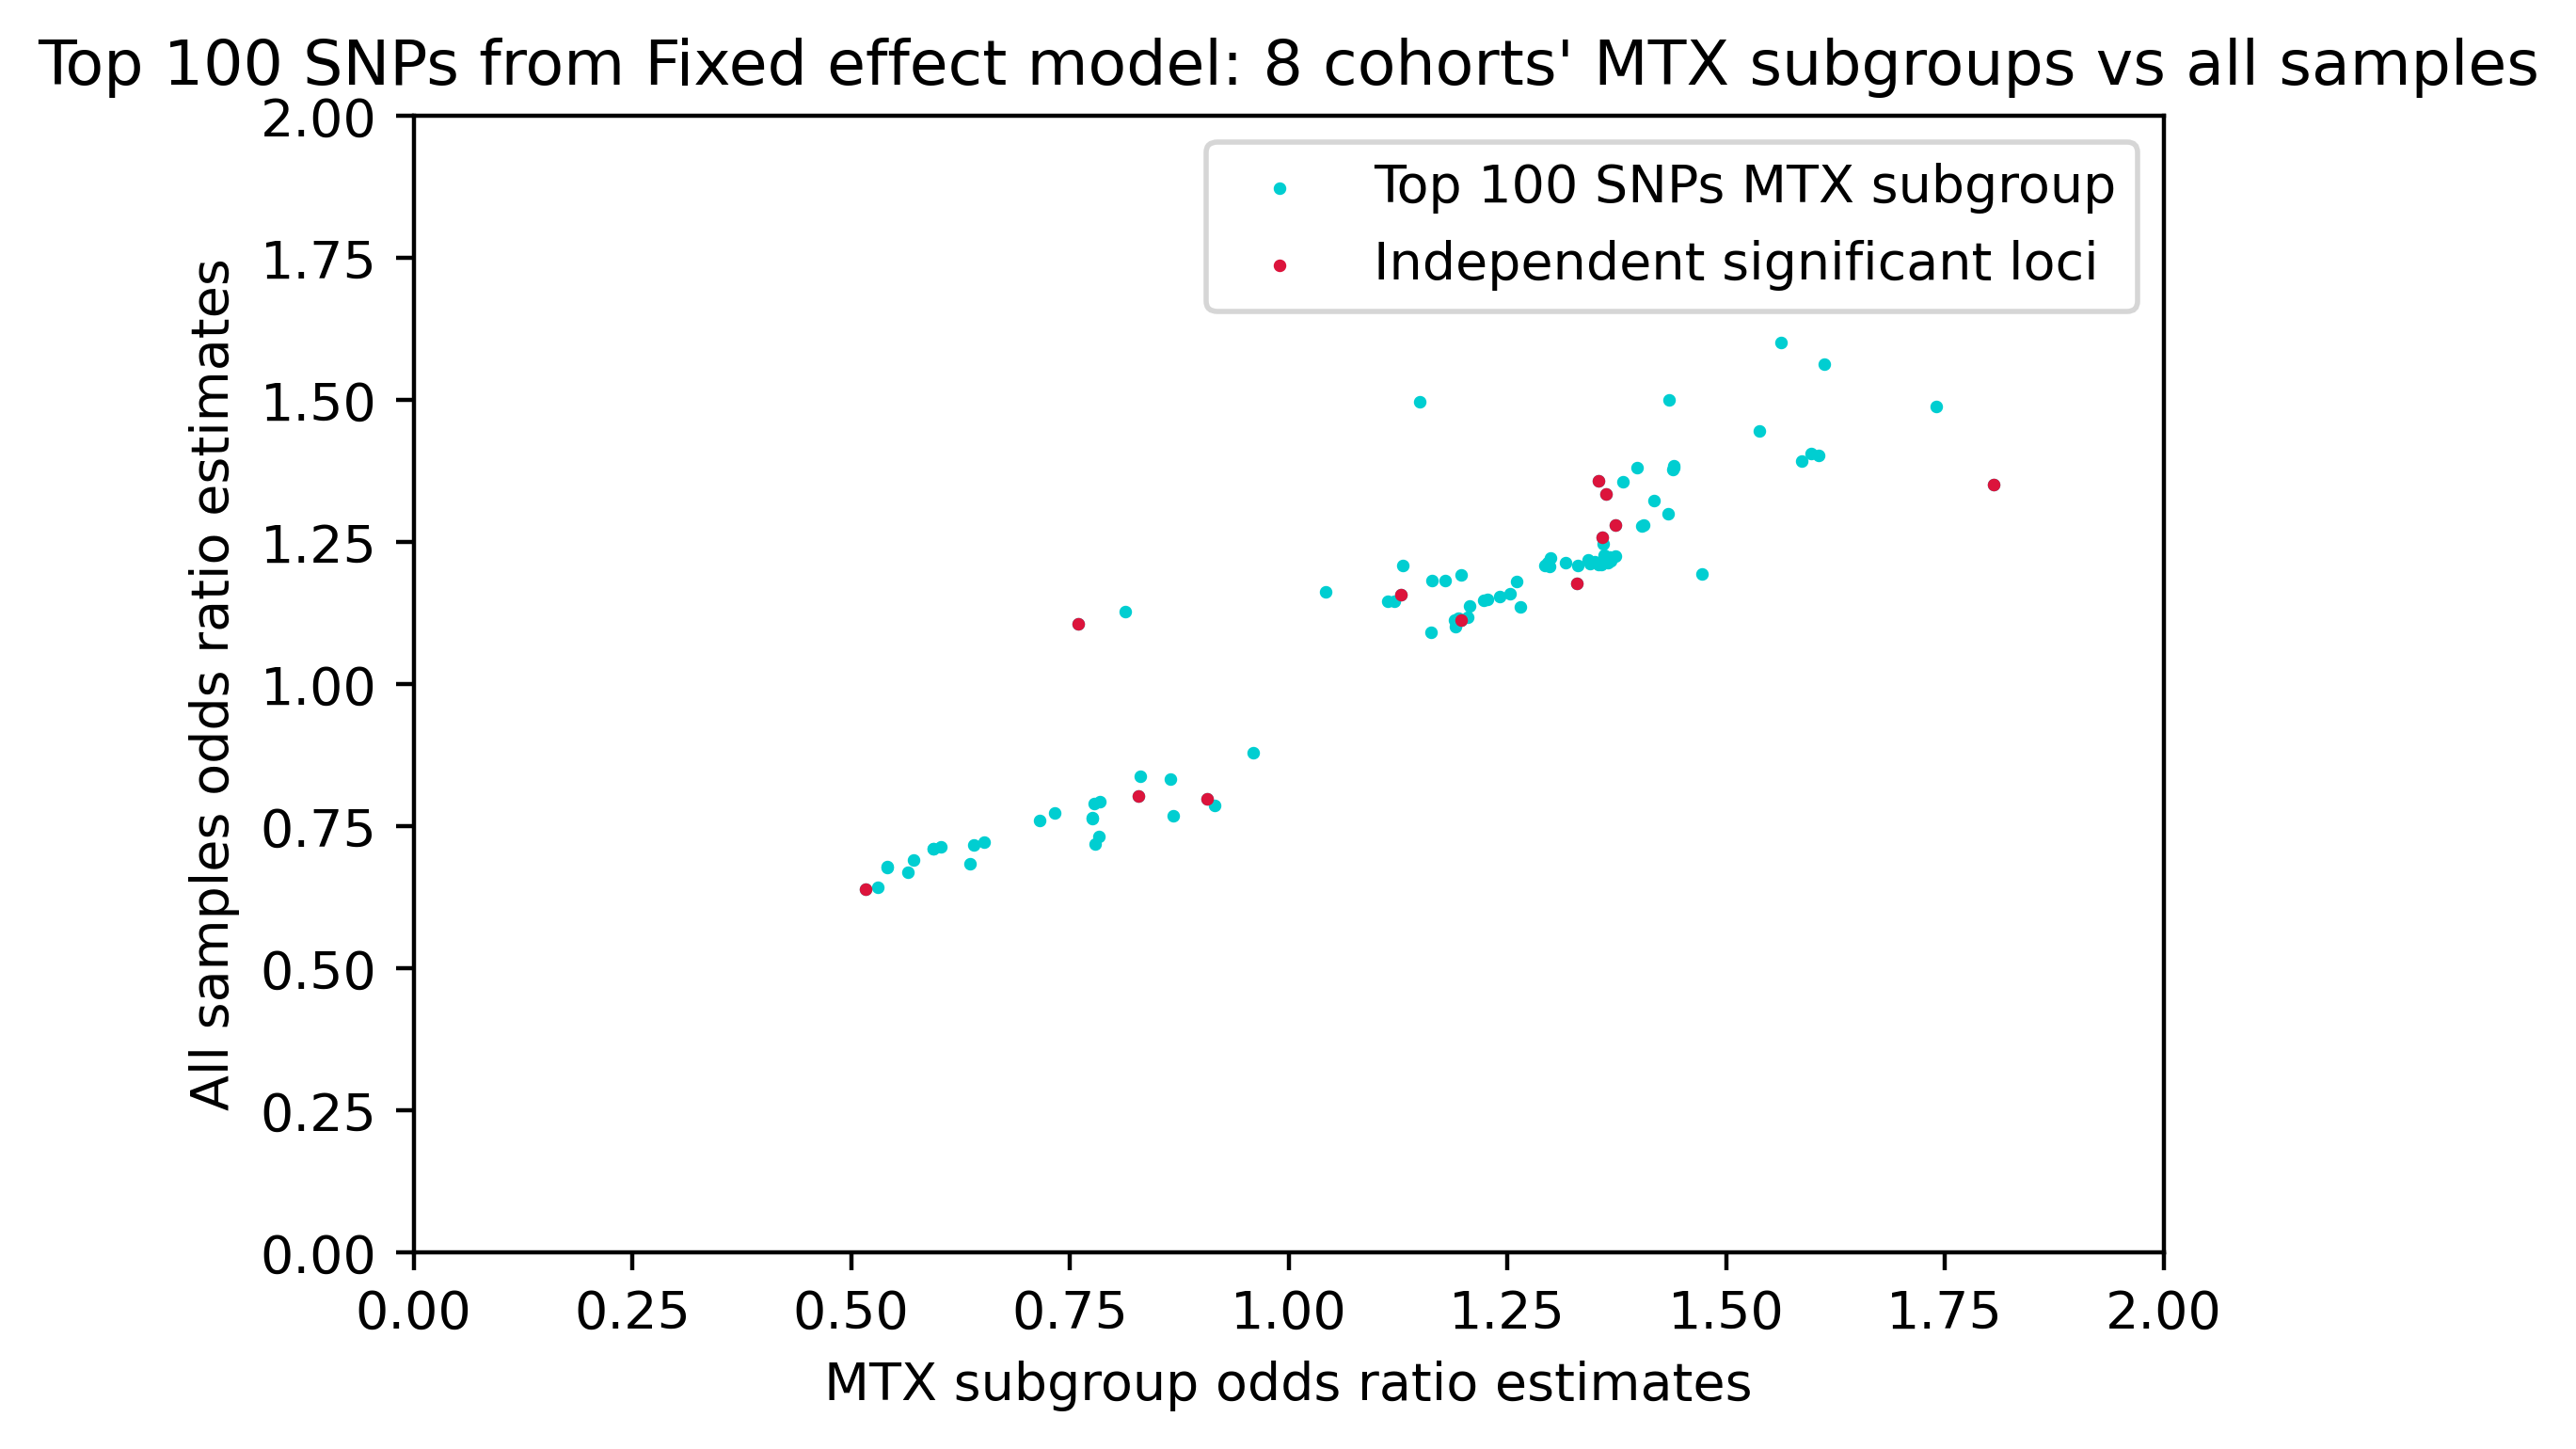

In [27]:
#SCATTER PLOT Odds ratio
plt.figure(dpi=400)
plt.title('Top 100 SNPs from Fixed effect model: 8 cohorts\' MTX subgroups vs all samples',fontsize=12)

plt.xlabel('MTX subgroup odds ratio estimates')
plt.ylabel('All samples odds ratio estimates')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = 'Purple'
plt.xlim([0,2])
plt.ylim([0,2])
plt.scatter(Merged['OR_MTXsubgroup'],Merged['OR_latest_meta'],c=colors1,label='Top 100 SNPs MTX subgroup',s=2)
plt.scatter(Merged_IndsigSNPs['OR_MTXsubgroup'],Merged_IndsigSNPs['OR_latest_meta'],c=colors2,label='Independent significant loci',s=2)


# plt.scatter(,c=colors2,label='Samantha\'s GWAS')

plt.legend()
plt.show()
#Low stability